**GLOBAL SUPERSTORE DATASET**

Proyek ini bertujuan untuk menganalisis data penjualan dari dataset Global Superstore, yaitu kumpulan data transaksi ritel global yang mencakup informasi pelanggan, produk, pengiriman, serta performa penjualan.

Melalui analisis ini, peneliti berfokus pada tiga aspek utama: analisis pelanggan, analisis produk, dan analisis tren penjualan.

- Analisis pelanggan dilakukan untuk memahami karakteristik dan segmentasi konsumen berdasarkan perilaku pembelian serta profitabilitasnya.
- Analisis produk bertujuan mengidentifikasi kategori dan subkategori produk dengan performa terbaik maupun terendah.
- Analisis tren dilakukan untuk melihat pola penjualan dari waktu ke waktu, seperti fluktuasi penjualan dan profit per periode.

Hasil dari proyek ini diharapkan dapat memberikan wawasan yang mendalam bagi pengambilan keputusan strategis, seperti peningkatan penjualan, efisiensi distribusi, dan optimalisasi strategi pemasaran.

# **Import Modul**

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Memanggil Data**

In [44]:
!git clone https://github.com/Dwiatikaa/Projects.git
%cd Projects

db = pd.read_csv('Global_Superstore2.csv', encoding='latin-1')
db

Cloning into 'Projects'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 3.43 MiB | 14.16 MiB/s, done.
/content/Projects/Projects/Projects/Projects/Projects/Projects/Projects/Projects/Projects/Projects


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,NaN,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,77095.0,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,93030.0,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,NaN,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [45]:
db.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

#**Pre-processing**

###Cek data duplikat

In [46]:
data_duplicated = db.duplicated().sum()
print(f'Jumlah data duplikat: {data_duplicated}')

Jumlah data duplikat: 0


Tidak ditemukan adanya data yang duplikat

### Cek missing value

In [47]:
missing_values = db.isnull().sum()
print(f'Jumlah missing value pada data:\n{missing_values}')

Jumlah missing value pada data:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Terdapat missing value pada kolom Postal Code sebanyak 41296

####Penanganan missing value

In [48]:
# menghapus kolom Postal Code

db = db.drop(columns=['Postal Code'])

Kolom Postal Code di hapus karena memiliki missing value > 80% dari data dan kolom tersebut tidak berpengaruh terhadap tujuan analisis

### Cek outlier

In [49]:
# cek tipe data

db.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object


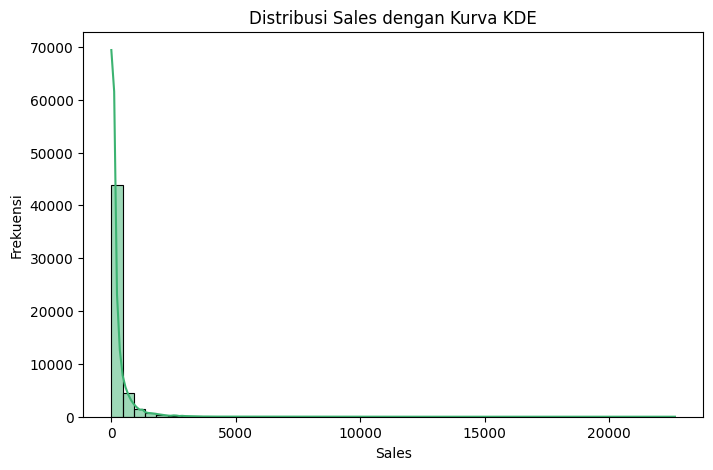

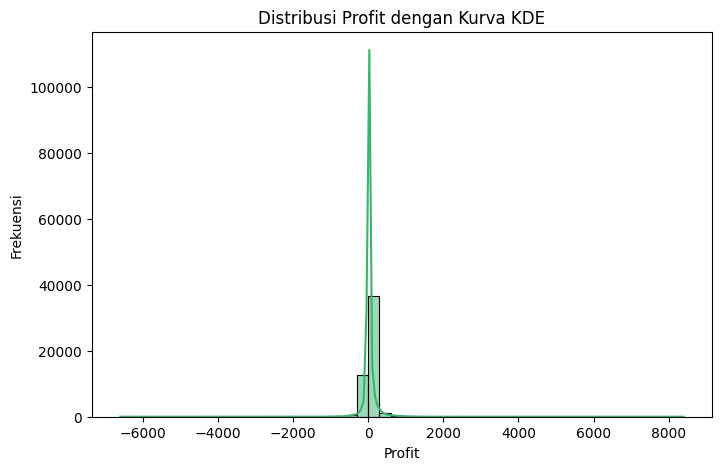

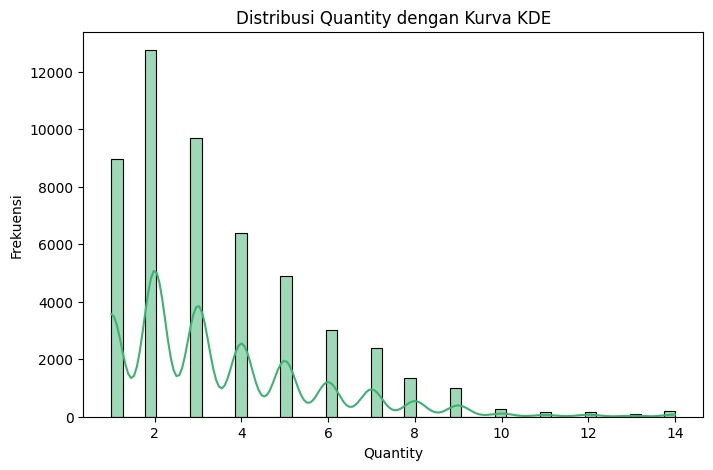

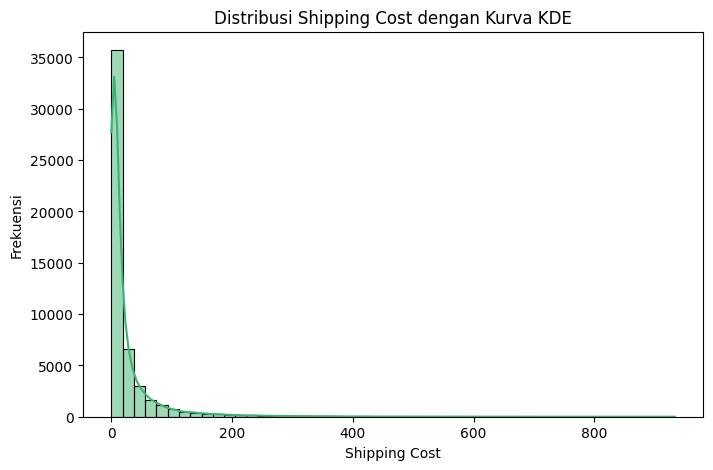

In [54]:
# cek distribusi data dengan histogram

cols = ['Sales', 'Profit', 'Quantity', 'Shipping Cost']

for col in cols:
    plt.figure(figsize=(8,5))
    sns.histplot(db[col], bins=50, kde=True, color='mediumseagreen')
    plt.title(f'Distribusi {col} dengan Kurva KDE')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

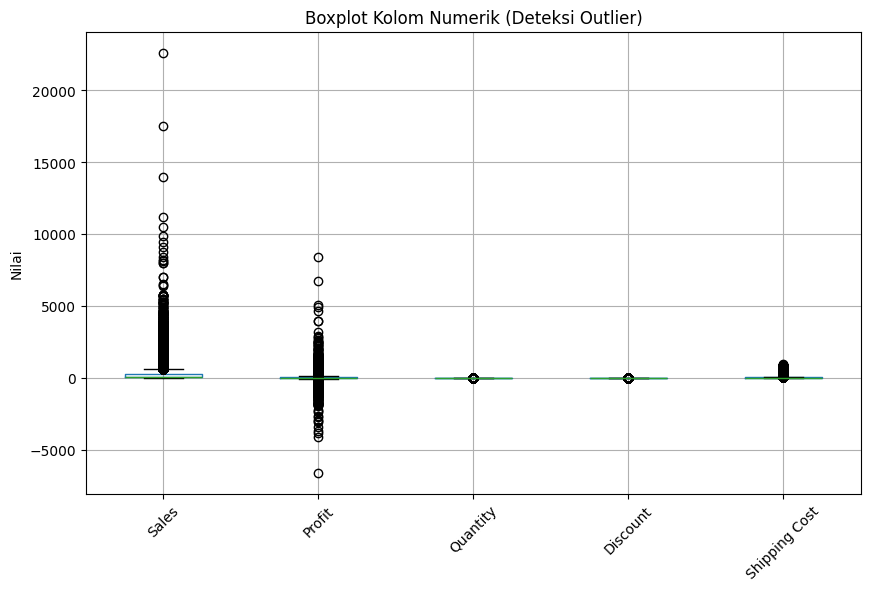

In [50]:
# cek distribusi data dengan boxplot

# Pilih kolom numerik
num_cols = ['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping Cost']

# Buat boxplot
plt.figure(figsize=(10,6))
db[num_cols].boxplot()
plt.title('Boxplot Kolom Numerik (Deteksi Outlier)')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.show()


In [62]:
# Pilih kolom numerik
num_cols = ['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping Cost']

# Fungsi untuk mendeteksi outlier pakai IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Buat kolom penanda outlier (1 = outlier, 0 = normal)
    df[f'{column}_Outlier'] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)

    outliers = df[df[f'{column}_Outlier'] == 1]
    print(f"Kolom {column}: {len(outliers)} outlier")
    return outliers

# Jalankan untuk tiap kolom numerik
for col in num_cols:
    detect_outliers_iqr(db, col)


Kolom Sales: 5655 outlier
Kolom Profit: 9755 outlier
Kolom Quantity: 877 outlier
Kolom Discount: 4172 outlier
Kolom Shipping Cost: 5909 outlier


####Penanganan outlier

In [64]:
# Gabungkan semua kolom flag outlier jadi satu kolom gabungan
outlier_flags = [f'{col}_Outlier' for col in num_cols]
db['Any_Outlier'] = db[outlier_flags].max(axis=1)

# Pisahkan data
db_outlier = db[db['Any_Outlier'] == 1]
db_clean = db[db['Any_Outlier'] == 0]

# Cek hasil
print("Total data:", len(db))
print("Data tanpa outlier:", len(db_clean))
print("Data outlier:", len(db_outlier))

Total data: 51290
Data tanpa outlier: 36311
Data outlier: 14979


Data outlier dipisahkan dari data utama agar hasil analisis tidak terdistorsi oleh nilai ekstrem, sehingga pola tren dan perilaku pelanggan dapat tercermin secara lebih akurat. Selanjutnya analisis pelanggan, produk, dan tren akan menggunakan data tanpa outlier untuk memberikan gambaran umum yang lebih representatif.

# **Analisis Pelanggan**

### Total dan rata-rata penjualan per pelanggan


Statistik Penjualan per Pelanggan:
             Sales       Profit    Quantity  Avg Sales per Order
count   795.000000   795.000000  795.000000           795.000000
mean   4403.126467   655.003138  141.849057           168.582767
std    1222.296440   237.294453   35.565880            35.667244
min    1525.108000    32.133200   59.000000            77.962614
25%    3549.003450   483.890500  117.000000           144.422784
50%    4354.016000   646.498560  141.000000           164.682700
75%    5185.643420   811.022300  166.000000           189.109090
max    9081.736500  1817.352500  260.000000           306.138587


/tmp/ipython-input-879495440.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Sales', y='Customer Name', palette='Blues_r')


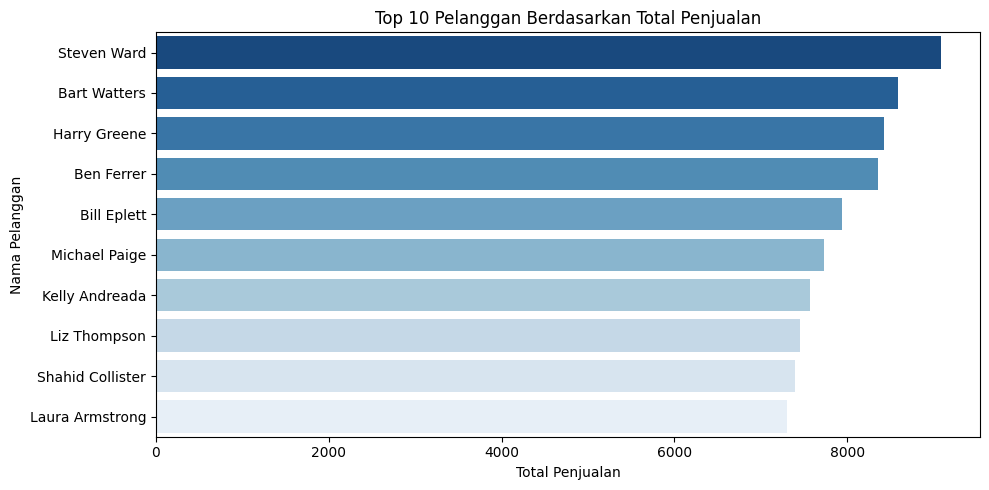

In [120]:
customer_sales = db_clean.groupby('Customer Name')[['Sales', 'Profit', 'Quantity']].sum().reset_index()
customer_sales['Avg Sales per Order'] = customer_sales['Sales'] / db_clean.groupby('Customer Name')['Order ID'].nunique().values

print("\nStatistik Penjualan per Pelanggan:")
print(customer_sales.describe())

# Top 10 pelanggan berdasarkan total sales
top_customers = customer_sales.sort_values('Sales', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_customers, x='Sales', y='Customer Name', palette='Blues_r')
plt.title('Top 10 Pelanggan Berdasarkan Total Penjualan')
plt.xlabel('Total Penjualan')
plt.ylabel('Nama Pelanggan')
plt.tight_layout()
plt.show()

### Analisis berdasarkan segmentasi

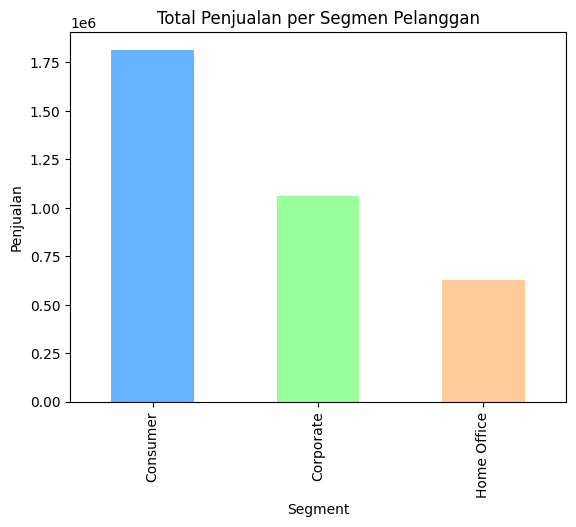

In [121]:
# Segmentasi pelanggan

segment_summary = (
    db_clean.groupby('Segment')
    .agg({'Sales':'sum', 'Profit':'sum', 'Customer ID':'nunique'})
    .rename(columns={'Customer ID':'Jumlah Pelanggan'})
)

segment_summary['Sales'].plot(kind='bar', color=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Total Penjualan per Segmen Pelanggan')
plt.ylabel('Penjualan')
plt.show()

Segmen Consumer memiliki total penjualan tertinggi, jauh di atas segmen lainnya.

###Korelasi antara penjualan dan profit per pelanggan

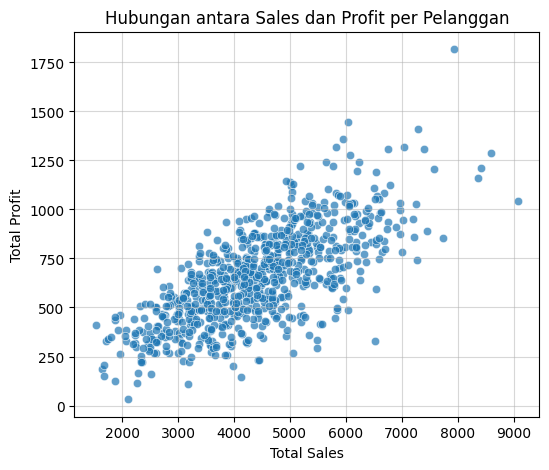

In [124]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=customer_sales, x='Sales', y='Profit', alpha=0.7)
plt.title('Hubungan antara Sales dan Profit per Pelanggan')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.grid(alpha=0.5)
plt.show()

Grafik menunjukkan adanya hubungan positif antara total penjualan (Sales) dan total keuntungan (Profit) per pelanggan, di mana semakin tinggi nilai penjualan, umumnya semakin besar pula keuntungan yang diperoleh.

# **Analisis Produk**

###1. Negara mana yang menghasilkan total penjualan tertinggi?

In [78]:
# Kelompokkan berdasarkan negara dan jumlahkan penjualan
country_sales = db_clean.groupby('Country')['Sales'].sum()

# Dapatkan negara teratas
top_country = country_sales.idxmax()

# Tampilkan negara teratas
print(f"Negara dengan total penjualan tertinggi adalah: {top_country}")

Negara dengan total penjualan tertinggi adalah: United States


###2. Produk mana yang paling menguntungkan?

In [82]:
product_sales = db_clean.groupby('Product ID')['Sales'].sum().reset_index()

# Hitung total penjualan dan profit per produk
product_sales = db_clean.groupby('Product Name')['Sales'].sum().reset_index()
product_profit = db_clean.groupby('Product Name')['Profit'].sum().reset_index()

# Gabungkan kedua DataFrame berdasarkan Product ID
product_sales = product_sales.merge(product_profit, on='Product Name')

# Hitung margin keuntungan
product_sales['Margin_Keuntungan'] = (product_sales['Profit'] / product_sales['Sales']) * 100

# Urutkan berdasarkan profit
product_sales = product_sales.sort_values('Profit', ascending=False)

(product_sales.head())

,Product Name,Sales,Profit,Margin_Keuntungan
2976,Staples,6410.8380,2440.0055,38.060633
799,"Cardinal Binding Machine, Clear",4692.2754,1701.4254,36.260135
1765,"Ibico Binding Machine, Durable",4294.4580,1325.6880,30.869740
653,"Boston Sketch Pad, Blue",3772.6560,1312.8160,34.798190
2564,"Rogers File Cart, Single Width",8198.3468,1209.3068,14.750618


Produk yang paling menguntungkan adalah Staples.

### 3. Produk mana yang paling banyak volume penjualannya?

In [92]:
# Hitung total quantity per produk
product_sales_volume = db_clean.groupby('Product Name')['Quantity'].sum()

# Cari produk dengan volume tertinggi
top_product = product_sales_volume.idxmax()
top_quantity = product_sales_volume.max()

print(f"Produk yang paling banyak volume penjualannya adalah '{top_product}' dengan total {top_quantity} unit terjual.")

Produk yang paling banyak volume penjualannya adalah 'Staples' dengan total 787 unit terjual.


###4. Berapa lama waktu yang diperlukan untuk memproses dan mempersiapkan pesanan sebelum pengiriman (order processing time)?

In [101]:
import pandas as pd

# Pastikan kolom tanggal dalam format datetime
db_clean['Order Date'] = pd.to_datetime(db_clean['Order Date'])
db_clean['Ship Date'] = pd.to_datetime(db_clean['Ship Date'])

# Hitung waktu pemrosesan (dalam hari)
db_clean['Processing Time'] = (db_clean['Ship Date'] - db_clean['Order Date']).dt.days

# Statistik ringkas
processing_summary = db_clean['Processing Time'].describe()
print("Ringkasan Waktu Pemrosesan Pesanan (hari):")
print(processing_summary)

# Rata-rata waktu pemrosesan
avg_processing_time = db_clean['Processing Time'].mean()
print(f"\nRata-rata waktu pemrosesan pesanan adalah {avg_processing_time:.2f} hari.")

# (Opsional) Rata-rata waktu per mode pengiriman
shipmode_time = db_clean.groupby('Ship Mode')['Processing Time'].mean().sort_values()
print("\nRata-rata waktu pemrosesan per mode pengiriman:")
print(shipmode_time)

Ringkasan Waktu Pemrosesan Pesanan (hari):
count    36311.000000
mean         4.009006
std          1.714953
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Processing Time, dtype: float64

Rata-rata waktu pemrosesan pesanan adalah 4.01 hari.

Rata-rata waktu pemrosesan per mode pengiriman:
Ship Mode
Same Day          0.042448
First Class       2.191373
Second Class      3.247310
Standard Class    5.001806
Name: Processing Time, dtype: float64


/tmp/ipython-input-2588630147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_clean['Order Date'] = pd.to_datetime(db_clean['Order Date'])
/tmp/ipython-input-2588630147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_clean['Ship Date'] = pd.to_datetime(db_clean['Ship Date'])
/tmp/ipython-input-2588630147.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Rata-rata waktu pemrosesan pesanan adalah 4.01 hari.

Rata-rata waktu pemrosesan per mode pengiriman:

Ship Mode

Same Day          0.042448

First Class       2.191373

Second Class      3.247310

Standard Class    5.001806

### 5. Apakah order processing time berbeda-beda berdasarkan kategori produk atau negara?

In [107]:
# Berdasarkan kategori produk
processing_by_category = db_clean.groupby('Category')['Processing Time'].mean().sort_values()
print("Rata-rata Waktu Pemrosesan Berdasarkan Kategori Produk (hari):")
print(processing_by_category)

print("\n" + "-"*60 + "\n")

# Berdasarkan negara
processing_by_country = db_clean.groupby('Country')['Processing Time'].mean().sort_values()
print("Rata-rata Waktu Pemrosesan Berdasarkan Negara (hari):")
print(processing_by_country)


Rata-rata Waktu Pemrosesan Berdasarkan Kategori Produk (hari):
Category
Office Supplies    3.980888
Technology         4.076039
Furniture          4.077977
Name: Processing Time, dtype: float64

------------------------------------------------------------

Rata-rata Waktu Pemrosesan Berdasarkan Negara (hari):
Country
Bahrain              2.000000
Chad                 2.000000
Guinea-Bissau        2.333333
Swaziland            2.500000
Estonia              2.555556
                       ...   
Burundi              5.000000
Equatorial Guinea    5.000000
Macedonia            5.250000
Armenia              5.333333
Slovenia             6.000000
Name: Processing Time, Length: 136, dtype: float64


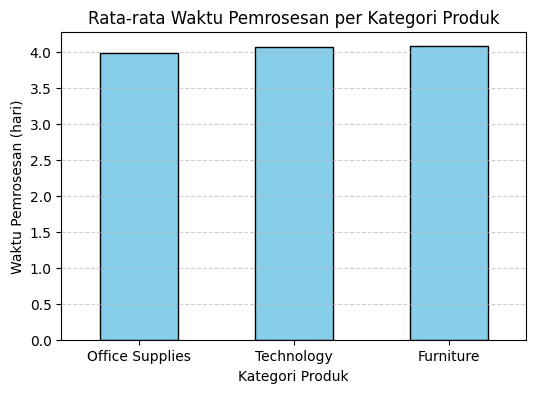

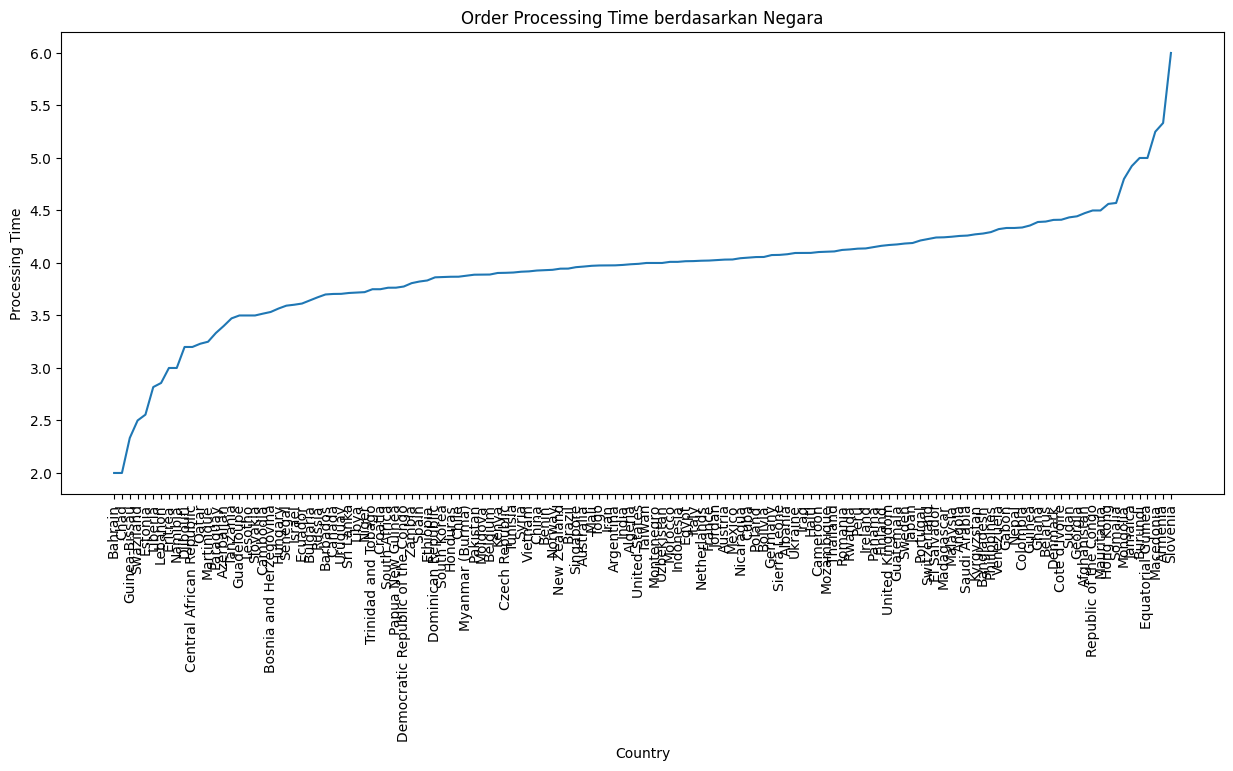

In [114]:
# Rata-rata waktu pemrosesan per kategori produk
processing_by_category = db_clean.groupby('Category')['Processing Time'].mean().sort_values()

plt.figure(figsize=(6,4))
processing_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rata-rata Waktu Pemrosesan per Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Waktu Pemrosesan (hari)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Rata-rata waktu pemrosesan per negara
processing_by_country = db_clean.groupby('Country')['Processing Time'].mean().reset_index().sort_values('Processing Time')

plt.figure(figsize=(15,6))
sns.lineplot(x='Country', y='Processing Time', data=processing_by_country)
plt.title('Order Processing Time berdasarkan Negara')
plt.xticks(rotation=90)
plt.show()

Order processing time berdasarkan kategori menunjukkan perbedaan yang sangat sedikit dan Order processing time berdasarkan negara menunjukkan adanya perbedaan yang cukup signifikan.


# **Analisis Tren**

### 1. Bagaimana trend total penjualan dan volume penjualan setiap bulannya?

/tmp/ipython-input-2164360764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_clean['Order Date'] = pd.to_datetime(db_clean['Order Date'])
/tmp/ipython-input-2164360764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_clean['Month'] = db_clean['Order Date'].dt.month


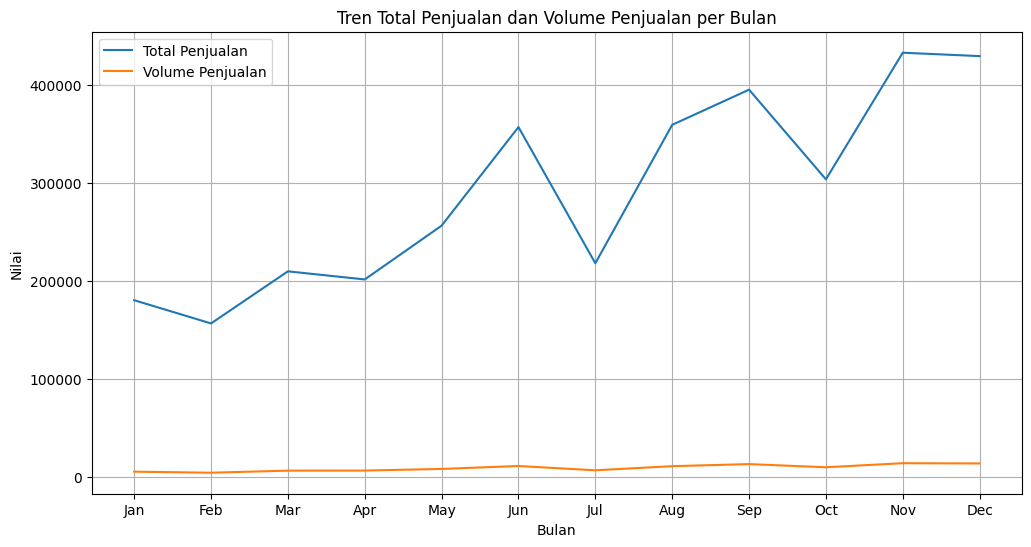

In [116]:
# Ubah tipe data kolom 'Order Date' menjadi datetime
db_clean['Order Date'] = pd.to_datetime(db_clean['Order Date'])

# Ekstrak bulan dari kolom 'Order Date'
db_clean['Month'] = db_clean['Order Date'].dt.month

# Kelompokkan data berdasarkan bulan dan hitung total penjualan dan volume penjualan
monthly_sales = db_clean.groupby('Month')['Sales'].sum()
monthly_quantity = db_clean.groupby('Month')['Quantity'].sum()

# Buat visualisasi tren menggunakan line chart
plt.figure(figsize=(12, 6))

plt.plot(monthly_sales.index, monthly_sales.values, label='Total Penjualan')
plt.plot(monthly_quantity.index, monthly_quantity.values, label='Volume Penjualan')

plt.title('Tren Total Penjualan dan Volume Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)

plt.show()

Total penjualan maupun volume penjualan mengalami fluktuasi, cenderung meningkat menjelang pertengahan hingga akhir tahun. Puncak penjualan terjadi pada bulan November dan Desember, yang kemungkinan disebabkan oleh peningkatan aktivitas belanja di akhir tahun seperti promosi besar atau musim liburan. Sebaliknya, penjualan terendah terjadi di bulan Februari dan Juli. Pola ini menunjukkan adanya faktor musiman yang memengaruhi performa penjualan, sehingga strategi promosi dan stok produk sebaiknya difokuskan pada periode dengan potensi penjualan tinggi.

###2. Bagaimana trendnya jika dilihat berdasarkan kategori produk.

/tmp/ipython-input-1197580722.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = db_clean.groupby([pd.Grouper(key='Order Date', freq='M'), 'Category'])['Sales'].sum().unstack()


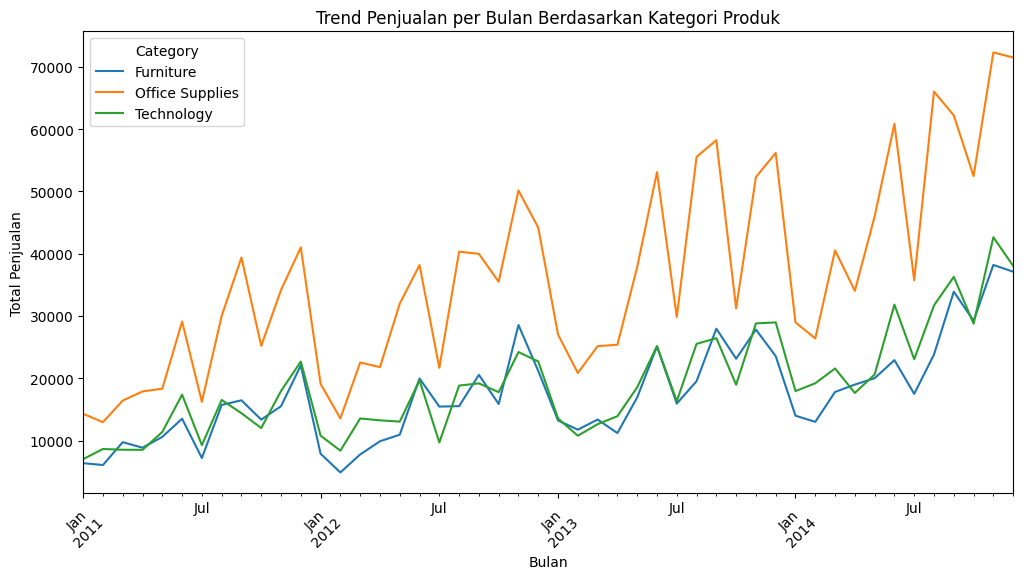

In [117]:
# Kelompokkan data dan unstack kategori
monthly_sales = db_clean.groupby([pd.Grouper(key='Order Date', freq='M'), 'Category'])['Sales'].sum().unstack()

# Ubah nama index menjadi 'Month'
monthly_sales.index.name = 'Month'

# Visualisasi menggunakan line chart
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Trend Penjualan per Bulan Berdasarkan Kategori Produk')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

Kategori Technology menunjukkan pertumbuhan yang paling stabil dan cenderung meningkat secara bertahap, sementara Furniture memiliki tren yang lebih berfluktuasi. Meskipun demikian, semua kategori menunjukkan pola peningkatan penjualan dari waktu ke waktu, dengan fluktuasi musiman yang cukup jelas setiap tahunnya.

# **Kesimpulan**

Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa penjualan perusahaan secara umum menunjukkan tren meningkat, terutama pada akhir tahun yang kemungkinan dipengaruhi oleh musim promosi dan peningkatan permintaan pelanggan. Dari sisi pelanggan, segmen Consumer memberikan kontribusi penjualan tertinggi, diikuti oleh segmen Corporate, yang menunjukkan bahwa pasar ritel menjadi target utama bisnis. Sementara itu, dari sisi produk, kategori Office Supplies mendominasi total penjualan, namun kategori Technology menunjukkan potensi pertumbuhan yang konsisten dalam jangka panjang. Secara keseluruhan, perusahaan disarankan untuk memperkuat strategi pemasaran pada segmen konsumen ritel dan fokus pada pengembangan produk teknologi